<a href="https://colab.research.google.com/github/PaulToronto/IBM---AI-Engineering-Professional-Certificate/blob/main/4_Training_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training Models

- Understanding how things work, under the hood, can help us quickly hone in on the appropriate model, the right algorithm to use, and a good set of hyperparameters for the task
- Also helps in debugging and performance analysis

## Imports

In [32]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import add_dummy_feature

from sklearn.linear_model import LinearRegression

## Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, but a constant called the **bias term** (aka intercept term)

$$
\widehat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_nx_n
$$

This can be written more concisely in a vectorized form:

$$
\widehat{y} = h_{\theta}\left(\mathbf{x}\right) = \mathbf{\theta}\cdot \mathbf{x}
$$

Training a model means setting its parameters so the the model best fits the training set. For this, we need a measure of how well the model fits the training data. The most common performance measure of a regression model is the **RMSE**.

$$
RMSE\left(\mathbf{X},h\right) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}\left(h\left(\mathbf{x}^{(i)}\right) - y^{(i)}\right)^{2}}
$$

To train a linear regression model, we need to find the value of $\mathbf{\theta}$ that minimizes the RMSE. In practice, it is easier to minimize the **MSE**, than the **RMSE** and it leads to the same result.

Note that learning algorithms will often optimize a different loss function during training than the performance measure used to evaluate the final model.

The MSE Cost Function:

$$
MSE\left(\mathbf{x},h_{\theta}\right) = \frac{1}{m}\sum_{i=1}^{m}\left(\mathbf{\theta}^{T}x^{(i)} - y^{(i)}\right)^{2}
$$

### The Normal Equation

To find the value of $\mathbf{\theta}$ that minimizes the MSE, there exits a closed-form solution that gives the result directly. This is called the **Normal equation**

$$
\widehat{\mathbf{\theta}} = \left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T}\mathbf{y}
$$

In [6]:
np.random.seed(42)

m = 100

X = 2 * np.random.rand(m, 1) # column vector
X[:10]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516]])

In [7]:
y = 4 + 3 * X + np.random.rand(m, 1)
y[:10]

array([[ 6.2786699 ],
       [10.34069625],
       [ 8.70631963],
       [ 8.1005216 ],
       [ 5.84367832],
       [ 5.18525935],
       [ 4.7588846 ],
       [ 9.95260801],
       [ 7.83548824],
       [ 8.32541538]])

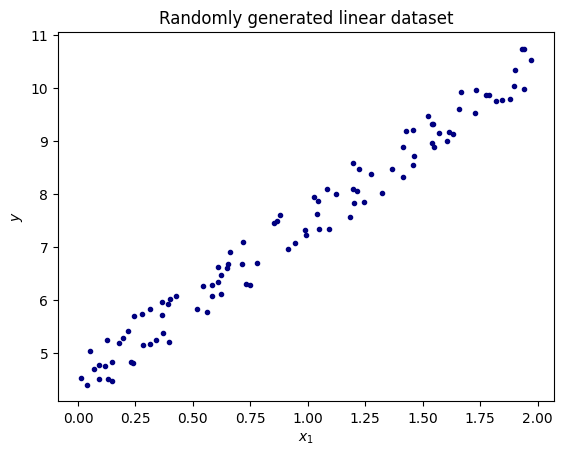

In [17]:
plt.scatter(X, y, marker='.', c='navy')
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.title('Randomly generated linear dataset')
plt.show()

In [21]:
# from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance
X_b[:10]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728],
       [1.        , 0.31198904],
       [1.        , 0.11616722],
       [1.        , 1.73235229],
       [1.        , 1.20223002],
       [1.        , 1.41614516]])

$$
\widehat{\mathbf{\theta}} = \left(\mathbf{X}^{T}\mathbf{X}\right)^{-1}\mathbf{X}^{T}\mathbf{y}
$$

In [22]:
theta_hat = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_hat

array([[4.51359766],
       [2.98323418]])

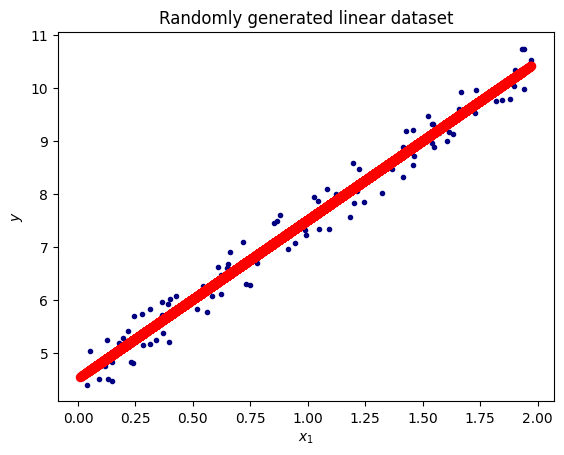

In [37]:
plt.scatter(X, y, marker='.', c='navy')
plt.plot(X, theta_hat[0] + theta_hat[1] * X, c='red', linewidth=7)
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.title('Randomly generated linear dataset')
plt.show()

In [26]:
X_new = np.array([[0],
                  [2]])
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.]])

In [27]:
y_predict = X_new_b @ theta_hat
y_predict

array([[ 4.51359766],
       [10.48006601]])

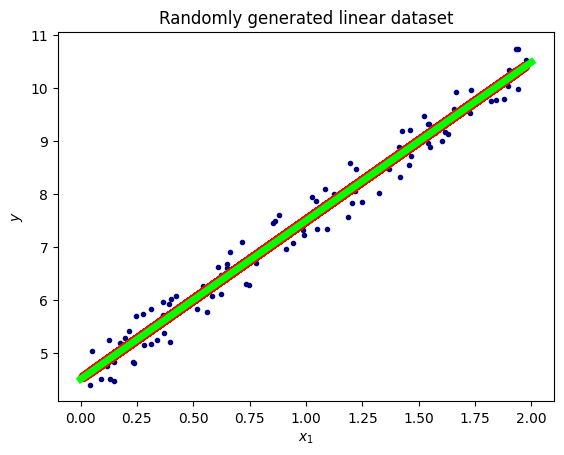

In [38]:
plt.scatter(X, y, marker='.', c='navy')
plt.plot(X, theta_hat[0] + theta_hat[1] * X, c='red', linewidth=7)
plt.plot(X_new, y_predict, color='lime', linewidth=5)
plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.title('Randomly generated linear dataset')
plt.show()

### With Scikit-Learn

In [39]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [40]:
# from Normal Equation
theta_hat

array([[4.51359766],
       [2.98323418]])

In [42]:
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [43]:
# from Normal Equation
y_predict

array([[ 4.51359766],
       [10.48006601]])

In [44]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])